In [231]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper', font_scale=1.3)

# Result 2

In [409]:
b = 1.3
v = 1
TA = 0.4
ΔT = np.linspace(-0.4, 0.6, 1000)
TB = TA - ΔT
α = 0.7

In [410]:
γ1 = (b*v*α*TA + (TA - TB)) / (v * (1-TB))
γ2 = (b*v*α*TB + (1+b)*(TA - TB)) / (v * (1-TB) + (1-v) *(TA - TB))

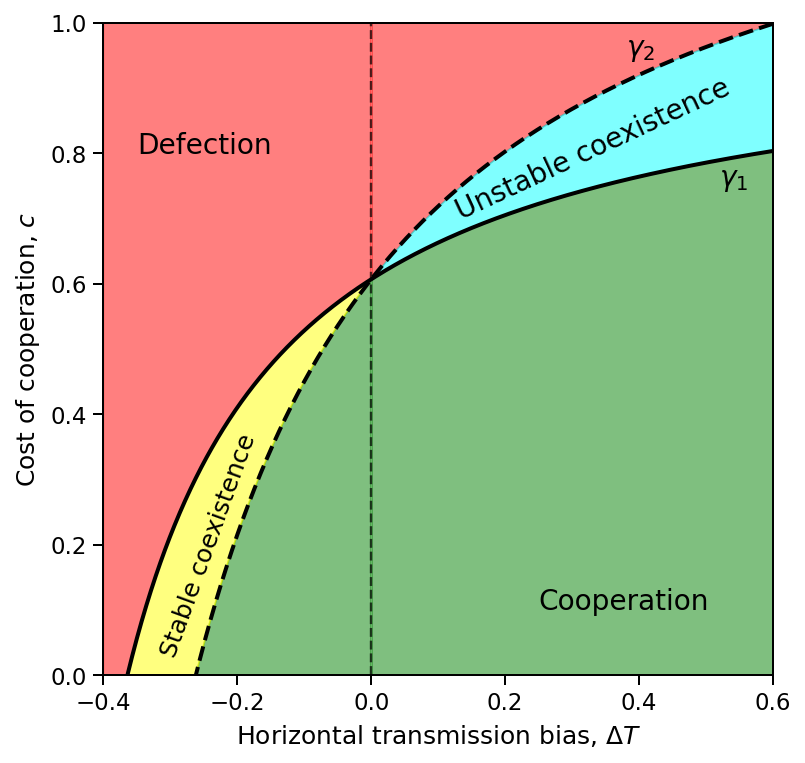

In [452]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(ΔT, γ1, '-k', lw=2)
ax.plot(ΔT, γ2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)

pos = ΔT>0
ax.fill_between(ΔT[pos], 0, γ1[pos], color='g', alpha=0.5)
ax.fill_between(ΔT[~pos], 0, γ2[~pos], color='g', alpha=0.5)
ax.fill_between(ΔT[pos], γ2[pos], 1, color='r', alpha=0.5)
ax.fill_between(ΔT[~pos], γ1[~pos], 1, color='r', alpha=0.5)
ax.fill_between(ΔT[~pos], γ2[~pos], γ1[~pos], color='yellow', alpha=0.5)
ax.fill_between(ΔT[pos], γ1[pos], γ2[pos], color='cyan', alpha=0.5)

ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1), 
       xlabel='Horizontal transmission bias, $\Delta T$',
       ylabel='Cost of cooperation, $c$',
#        title='α={}'.format(α)
)

fontdict = dict(size=14)
if α == 0.7:
    ax.text(0.52, 0.75, r'$\gamma_1$', fontdict=fontdict)
    ax.text(0.38, 0.95, r'$\gamma_2$', fontdict=fontdict)
    ax.text(0.25, 0.1, r'Cooperation', fontdict=fontdict, rotation=0)
    ax.text(-0.32, 0.03, 'Stable coexistence', rotation=70)
    ax.text(0.12, 0.7, r'Unstable coexistence', fontdict=fontdict, rotation=25)
    ax.text(-0.35, 0.8, 'Defection', fontdict=fontdict, rotation=0)
if α == 1/4:
    ax.text(0.1, 0.1, r'Cooperation', fontdict=fontdict, rotation=0)
    # ax.text(-0.2, 0.02, r'*Stable coexistence', rotation=60)
    ax.text(-0.1, 0.03, r'<-------Stable coexistence', rotation=90)
    ax.text(0.2, 0.5, r'Unstable coexistence', fontdict=fontdict, rotation=45)
    ax.text(-0.35, 0.8, 'Defection', fontdict=fontdict, rotation=0)
    
    
if α==0:
    fig.savefig('Figures/Result2_zero_alpha.pdf')
if α==0.7:
    fig.savefig('Figures/Result2__non_zero_alpha.pdf')

# Result 3

In [233]:
TB = 0.7
TA = 0.5
b = 2
α = 0.7

In [234]:
vhat = (TB - TA) / (1 - TA)

In [235]:
c = np.linspace(0, 1)
v = np.linspace(0, 1, 1000)
# v = np.concatenate([
#     np.linspace(1e-8, vhat-0.01),  np.linspace(vhat+0.01, 1)
# ])

In [236]:
γ1 = (b*v*α*TA + (TA - TB)) / (v * (1-TB))
γ1[np.isinf(γ1)] = -100
γ2 = (b*v*α*TB + (1+b)*(TA - TB)) / (v * (1-TB) + (1-v) *(TA - TB))

/Users/yoavram/miniconda3/envs/scipy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.35, 0.025, 'Fixation of defectors')

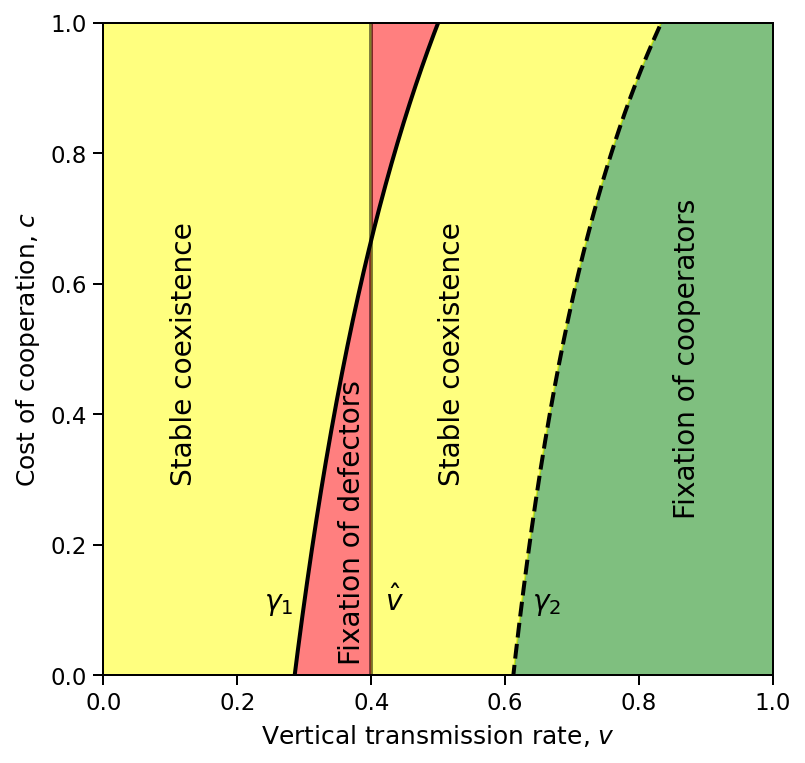

In [267]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(v, γ1, '-k', lw=2)
# γ2>1 when v<vhat for these parameter values
ax.plot(v[v>vhat], γ2[v>vhat], '--k', lw=2)
ax.axvline(vhat, ls='-', color='k', alpha=0.5, lw=2)

# iii.b v<vhat, γ2<c : irrelevant for these parameters.
ix = v<=vhat
ax.fill_between(v[ix], γ2[ix], 1, color='g', alpha=0.5)
# # iii.a, v>vhat, c<γ2
ix = v>vhat
ax.fill_between(v[ix], 0, γ2[ix], color='g', alpha=0.5)
# vi, γ1<c - problem
# ax.fill_between(v, γ1, color='r', alpha=0.5) 
# instead:
ix = v<=vhat
ax.fill_between(v[ix], 0, γ1[ix], color='r', alpha=0.5) 
ix = v>vhat
ax.fill_between(v[ix], γ1[ix], 1, color='r', alpha=0.5) 

# vii.a, v<vhat, γ1<c<γ2
ix = v<=vhat
ax.fill_between(v[ix], γ1[ix], γ2[ix], color='yellow', alpha=0.5)
# # vii.b, v>vhat, γ2<c<γ1
ix = v>vhat
ax.fill_between(v[ix], γ2[ix], γ1[ix], color='yellow', alpha=0.5)

ax.set(
    ylabel='Cost of cooperation, $c$',
    xlabel='Vertical transmission rate, $v$',
    ylim=(0, 1),
    xlim=(0, 1)
)

fontdict = dict(size=14)
ax.text(0.24, 0.1, r'$\gamma_1$', fontdict=fontdict)
ax.text(0.64, 0.1, r'$\gamma_2$', fontdict=fontdict)
ax.text(0.42, 0.1, r'$\hat v$', fontdict=fontdict)

ax.text(0.85, 0.25, r'Fixation of cooperators', fontdict=fontdict, rotation=90)
ax.text(0.1, 0.3, r'Stable coexistence', fontdict=fontdict, rotation=90)
ax.text(0.5, 0.3, r'Stable coexistence', fontdict=fontdict, rotation=90)
ax.text(0.35, 0.025, r'Fixation of defectors', fontdict=fontdict, rotation=90)